In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib  inline
sns.set_color_codes("pastel")

In [2]:
df = pd.read_csv('ign.csv')

Clean Data, mapping by platform by company & type

In [3]:
# check columnnames of dataframe
df.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [4]:
# combine year, month, date to datetime value in pandas
df["date"] = pd.to_datetime(df.release_year * 10000 + df.release_month * 100 + df.release_day, format='%Y%m%d')

In [5]:
# platform by company
Microsoft = ["Xbox", "Xbox 360", "Xbox One","Windows Phone"]
Nintendo = ["Nintendo DS","Nintendo 64 ","Nintendo DSi","Nintendo 3DS","Nintendo 64DD","New Nintendo 3DS"
            "GameCube","Game Boy Advance","Game Boy Color","Wii U","Wii","NES","Super NES"]
Sega =["Sega CD","Sega 32X", "Genesis","Dreamcast","Master System","Saturn","Sega CD","dreamcast VMU"] 
Sony = ["PlayStation","PlayStation 2","PlayStation 3","PlayStation 4","PlayStation Portable","PlayStation Vita"]
SNK = ["NeoGeo","NeoGeo Pocket Color"]
Bandai = ["WonderSwan","WonderSwan Color"]
Apple = ["iPhone","iPad","iPod"]

def mapping_company(item):
    if item in  Microsoft:
        return("Microsoft")
    elif item in Nintendo:
        return("Nintendo")
    elif item in Sega:
        return("Sega")
    elif item in Sony:
        return("Sony")
    elif item in Apple:
        return("Apple")
    elif item in SNK:
        return ("SNK")
    elif item in Bandai:
        return ("Bandi")
    return ("Others")

In [6]:
df["company"] = df.platform.map(mapping_company)

In [7]:
# platform by harware type
Computer = ["PC", "Macintosh", "Linux", "Commodore 64/128", "SteamOS"]
Console = ["PlayStation 2", "Xbox 360", "Wii", "PlayStation 3", "PlayStation", "Xbox",
           "GameCube", "Nintendo 64", "Dreamcast", "PlayStation 4", "Xbox One", "Wii U", "Genesis",
           "NES", "TurboGrafx-16", "Super NES", "Sega 32X", "Master System", "Saturn",
           "Atari 2600", "Atari 5200", "TurboGrafx-CD", "Ouya", "NeoGeo","Nintendo 64DD"]
Portable = ["Nintendo DSi", "PlayStation Portable", "Game Boy Advance", "Game Boy Color", "Nintendo 3DS",
            "PlayStation Vita" , "Lynx", "NeoGeo Pocket Color", "Game Boy", "WonderSwan",
            "New Nintendo 3DS", "WonderSwan Color", "dreamcast VMU","Nintendo DS"]
Mobile = ["iPhone", "iPad", "Android", "Windows Phone", "iPod", "Pocket PC", "Windows Surface", "N-Gage"]
Arcade = ["Arcade", "Vectrex"]

In [8]:
def mapping_type(item):
    if item in Computer:
        return("Computer")
    elif item in Console:
        return("Console")
    elif item in Portable:
        return("Portable")
    elif item in Mobile:
        return("Mobile")
    elif item in Arcade:
        return("Arcade")
    return ("Others")
df["type"] =df.platform.map(mapping_type)

In [9]:
df = df.loc[:,["title","platform","score","genre","date", "company","type","release_year","release_month","release_day"]]
df.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
2,Splice: Tree of Life,iPad,8.5,Puzzle,2012-09-12,Apple,Mobile,2012,9,12
3,NHL 13,Xbox 360,8.5,Sports,2012-09-11,Microsoft,Console,2012,9,11
4,NHL 13,PlayStation 3,8.5,Sports,2012-09-11,Sony,Console,2012,9,11


Step 2: read the file which contains the release date of hardwares, and join to game data file

In [10]:
df1 = pd.read_csv('console_release.csv')

In [11]:
df1["date"] = pd.to_datetime(df1.year * 10000 + df1.month * 100 + df1.day, format='%Y%m%d')

In [12]:
df1 = df1.loc[:,["Console","date"]]

In [13]:
df1.columns = ["platform","console_date"]

In [14]:
# history of the gaming platforms by release date 
df1 = df1.sort_values("console_date")
df1 

,platform,console_date
19,Genesis,1988-10-29
5,PlayStation,1994-12-03
11,Nintendo 64,1996-06-23
10,Game Boy Color,1998-10-21
12,Dreamcast,1998-11-27
0,PlayStation 2,2000-03-04
8,Game Boy Advance,2001-03-21
9,GameCube,2001-09-14
6,Xbox,2001-11-15
4,Nintendo DS,2004-11-21


In [15]:
df_type = pd.merge(df, df1, on=["platform"])

In [16]:
df_type.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day,console_date
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
2,Madden NFL 13,PlayStation Vita,6.0,Sports,2012-08-24,Sony,Portable,2012,8,24,2011-12-17
3,FIFA Soccer 13,PlayStation Vita,4.0,Sports,2012-10-12,Sony,Portable,2012,10,12,2011-12-17
4,New Little King's Story,PlayStation Vita,5.8,RPG,2012-10-11,Sony,Portable,2012,10,11,2011-12-17


# Part 1: Explore number of releases

## Question 1: What are the most popular year, month, day to realse a game?

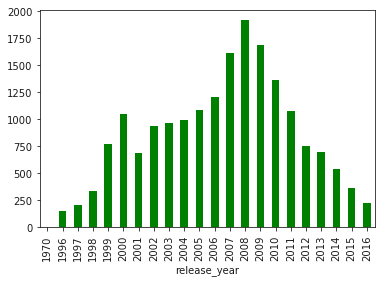

In [17]:
df.groupby('release_year').size().plot(kind='bar',color='green')

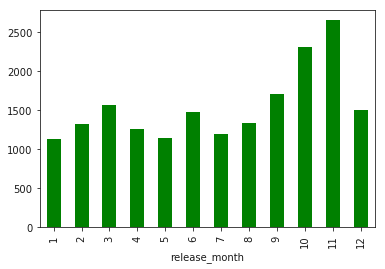

In [18]:
df.groupby('release_month').size().plot(kind='bar',color='green')

In [19]:
df.release_year.value_counts().head(1)

2008    1915
Name: release_year, dtype: int64

In [20]:
df.release_month.value_counts()

11    2657
10    2310
9     1707
3     1573
12    1505
6     1483
8     1338
2     1327
4     1264
7     1190
5     1143
1     1128
Name: release_month, dtype: int64

In [21]:
# the total percentage of 4th quarter releases 
len(df[df.release_month.isin([10,11,12])])/len(df) * 100

34.748993288590604

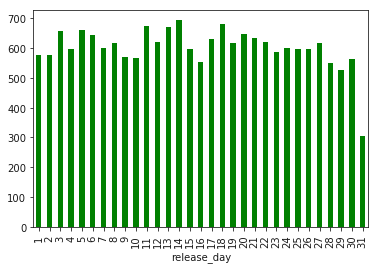

In [22]:
df.groupby('release_day').size().plot(kind='bar',color='green')

In [23]:
df.release_day.value_counts().head(3)

14    693
18    680
11    673
Name: release_day, dtype: int64

In [24]:
# top number of games released date
df.date.value_counts().head(10)

1999-07-06    73
1996-11-25    64
1996-11-21    33
1996-11-26    28
2009-11-03    25
2008-11-24    24
2006-11-22    23
2007-11-20    23
2007-11-13    23
2000-10-23    21
Name: date, dtype: int64

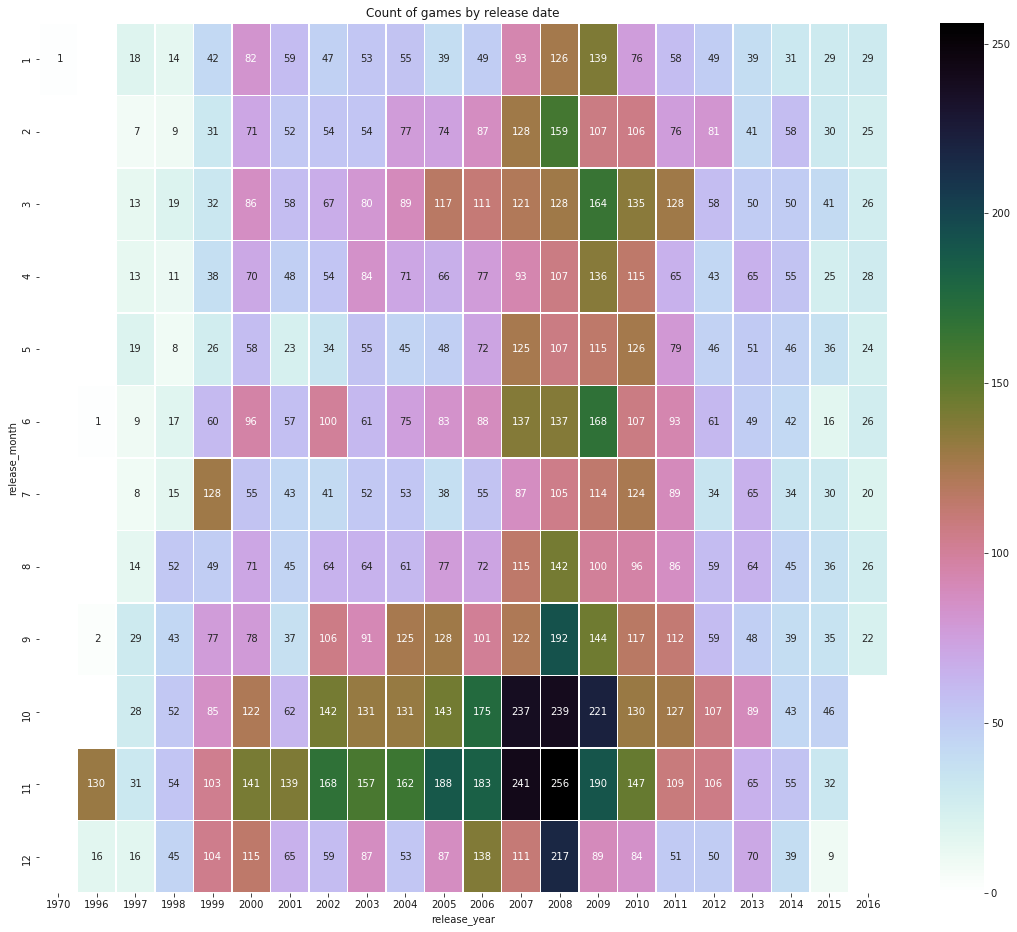

In [25]:
count_date = pd.pivot_table(df,values=['score'],index=['release_month'],
                             columns=['release_year'],aggfunc='count',margins=False)
plt.figure(figsize=(19,16))
sns.heatmap(count_date.score,linewidths=.5,annot=True,fmt='2.0f',vmin=0,cmap = plt.cm.cubehelix_r)
plt.title('Count of games by release date')

In [26]:
df.release_year = df.release_year.astype(str)

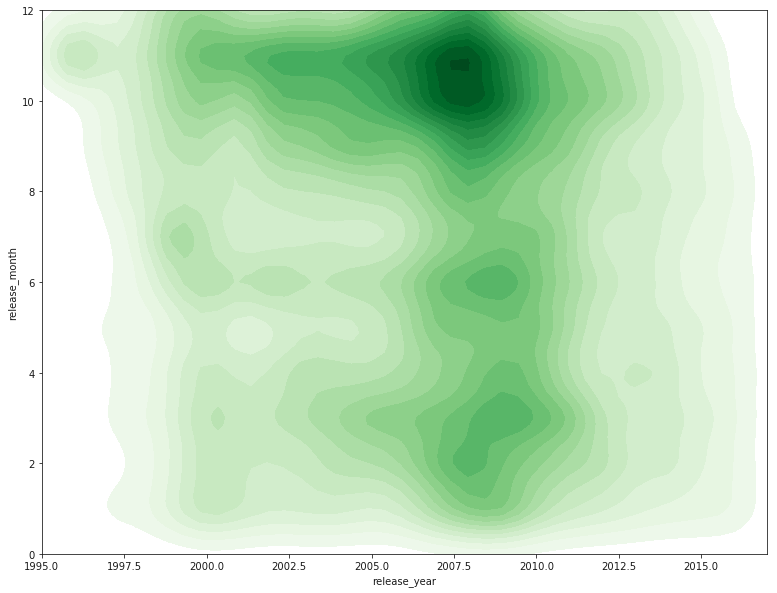

In [27]:
plt.figure(figsize=(13,10))
plt.xlim(1995,2017)
plt.xlabel = range(1995,2017)
plt.ylim(0,12)
sns.kdeplot(df.release_year, df.release_month, n_levels=22, cmap="Greens", shade=True, shade_lowest=False)

## Conclusion 1:
### Dates that release most amounts of games: 
              Year 2008 : 1915 games
              Month 11 : 2657 games
              Day 14 : 693 games
              Date 1999-07-06 : 73 games
              The most popular month-day pair is 2008-11: 256 games 
              The combination of most popular year, month and day is 2008-11-14,
              when 28 games are relased, ranked number 6 popular date of all game history.
         

### Trend
    The first small peak is reach by year 2000 (4th top releases). With a slightly drop from 2000 to 2001, number of releases each year continued increasing till 2009. 2008, 2009 and 2007 are top 3 years that released most video games, indicating that game video industry is at its peak during these years. 

    Year 2000-2010, September-November has relatively more releases than other times.
    Year 2007-2008, October-Novermber are peak times for game releases

    Number of releases continued decreasing after 2009. Within each quarter, the last month of each quarter (month 3,6,9) has most games released except for 4th quarter. The 4th quarter anomly might due to holidays and vacation in December. 

    It's worth noticing that November, October and December, March and December are top 5 months for releasing games. The 4th quarter has 0.347489932885906% of total releases. However, the total releases on each day of the month is similar. 
              

## Question 2 : Popular releases by type, company, genre

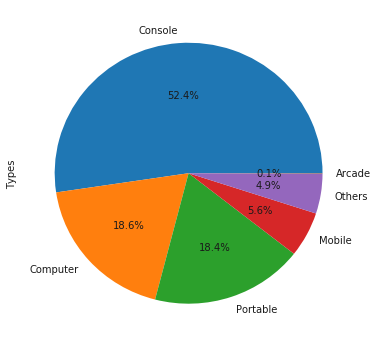

In [28]:
plt.figure(figsize=(6,6))
type_size = pd.DataFrame(df.groupby('type').size().sort_values(0,ascending = False ))
type_size.columns=["Types"]
type_size["Types"].plot(kind='pie',autopct='%1.1f%%')

In [29]:
# percentage of game released per genre
pd.DataFrame(df.groupby('genre').size()/len(df)*100).sort_values(0,ascending = False ).head(3)

,0
genre,
Action,20.386577
Sports,10.287248
Shooter,8.644295


In [30]:
pd.DataFrame(df.groupby('platform').size()/len(df)*100).sort_values(0,ascending = False ).head(5)

,0
platform,
PC,18.093960
PlayStation 2,9.052349
Xbox 360,8.757047
Wii,7.334228
PlayStation 3,7.280537


In [31]:
pd.DataFrame(df.groupby('company').size()/len(df)*100).sort_values(0,ascending = False ).head(5)

,0
company,
Others,29.186577
Sony,27.162416
Nintendo,21.863087
Microsoft,14.357047
Apple,5.143624


## Conclusion 2: 
### Number of games releases by platform, genre, type ,and company (Top 3)
    Platform: 19.09% of games released on PC, 9.05% on PlayStation2, 8.75% on Xbox 360 
    Genre: 20.38% of games are action games, 10.287% sports, 8.644% shooter  
    Type: 52.4% of games released on a console,computer 18.6% and portables 18.4%
    Company: others 29.18%, Sony 27.16%, Nintendo 21.86%

# Question 3: Pattern of games releases counts each genre by year

In [32]:
top_genre = df.genre.value_counts().head(10)

In [33]:
top_genre.index

Index(['Action', 'Sports', 'Shooter', 'Racing', 'Adventure', 'Strategy', 'RPG',
       'Platformer', 'Puzzle', 'Action, Adventure'],
      dtype='object')

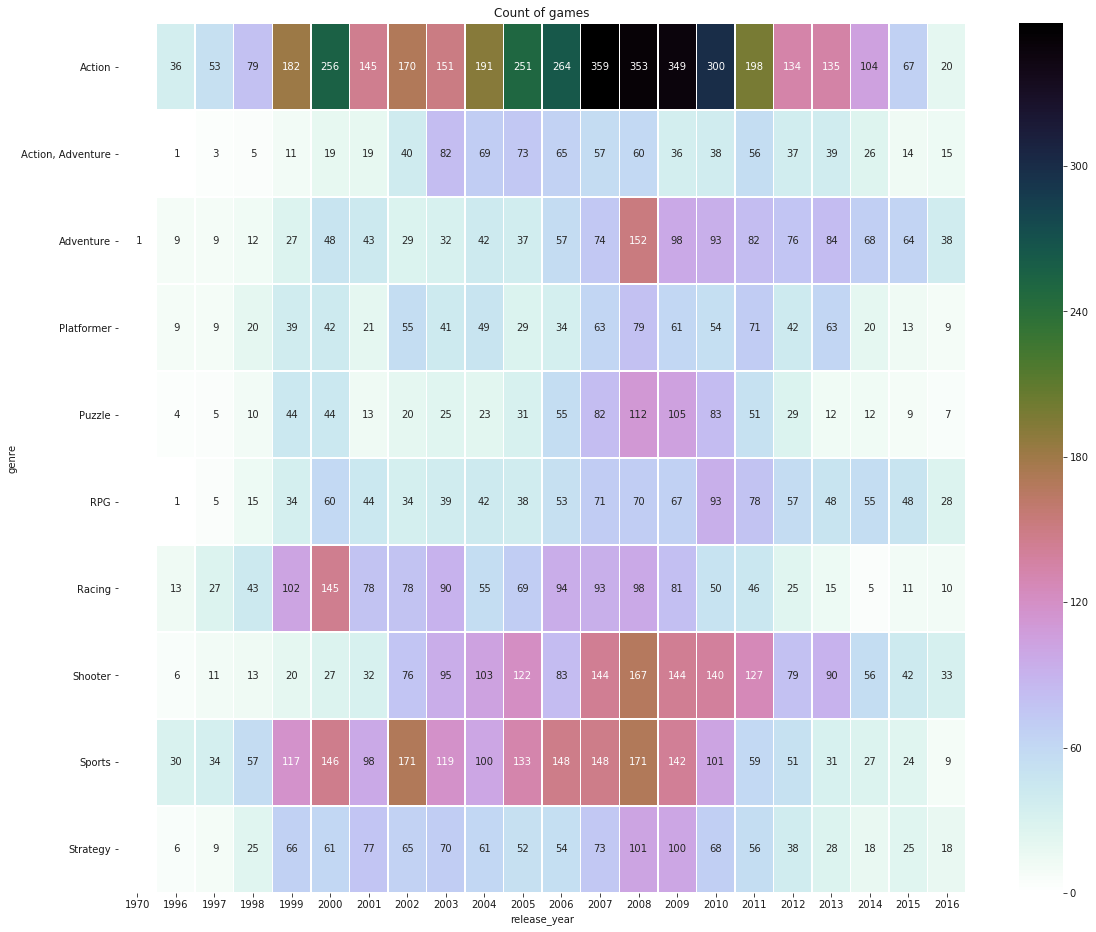

In [34]:
table_count = pd.pivot_table(df[df.genre.isin(top_genre.index)],values=['score'],index=['genre'],
                             columns=['release_year'],aggfunc='count',margins=False)
plt.figure(figsize=(19,16))
sns.heatmap(table_count.score,linewidths=.5,annot=True,fmt='2.0f',vmin=0,cmap = plt.cm.cubehelix_r)
plt.title('Count of games')

## Conclusion 3:
### Counts on genres & years 

##### By visulizing releases counts for each year on different genres through heatmap, we can see that:
    Year 2007, 2008 and 2009 has most releases for Action games. 
    Year 2008 is also the year of Adventure games, shooters game.   
    Year 2002 and Year 2008 tied, ranked number one on sports game genre.  
    


# Part 2: Explore relationship of review scores of games with other factors


## Question 1: The distribution and some statistics of the review scores? Is is normally distributed? 

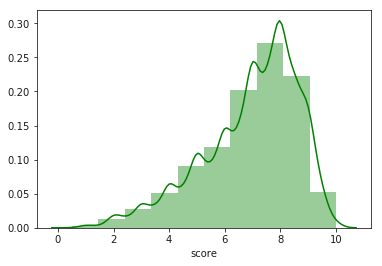

In [35]:
# check distribution of score
sns.distplot(df.score, bins = 10, color = "Green")

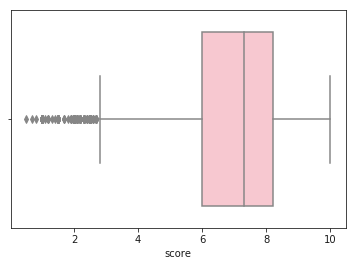

In [36]:
sns.boxplot(x="score", data = df,color = "pink" )

In [37]:
df.score.describe()

count    18625.000000
mean         6.950459
std          1.711736
min          0.500000
25%          6.000000
50%          7.300000
75%          8.200000
max         10.000000
Name: score, dtype: float64

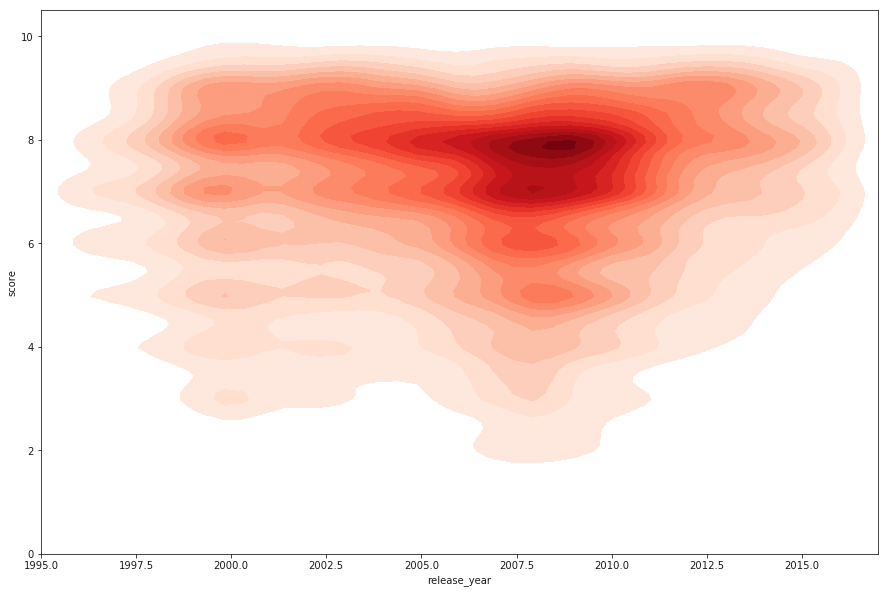

In [38]:
plt.figure(figsize=(15,10))
plt.ylim(0,10.5)
plt.xlim(1995,2017)
sns.kdeplot(df.release_year, df.score, n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

In [39]:
df.score.notnull().value_counts()

True    18625
Name: score, dtype: int64

# Conclusion 1: 
## Review score statistics
### There are 18625 games reviewed, with mean score of 6.950459 , max score 10 and min score 0.5. There is no missing value for score columns.  The distribution of review scores of games is skewed to left, with outliers on left side. IQR of review score is [6,8.2] 

## Question 2: Are review socres distribution same for all the platform type? Which has highest/lowest scores?

In [40]:
company_avg = pd.DataFrame(df.groupby("company").score.mean())

In [41]:
type_avg = pd.DataFrame(df.groupby("type").score.mean())

In [42]:
type_avg.colnames =["types","avg_score"]
company_avg.colnames = ["company","avg_score"]

In [43]:
type_avg.sort_values("score", ascending = False)

,score
type,
Mobile,7.306328
Computer,7.170675
Others,7.160742
Console,6.942591
Portable,6.589397
Arcade,6.069231


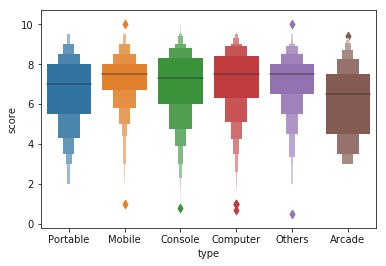

In [44]:
sns.lvplot(x="type", y = "score", data = df)

## Conclusion 2: 
### Review socre v.s. platform type

    Mobile games has highest average score (7.306)
    Arcade games has lowest average score(6.069)
    Portable games and acade games has stable scores (no outlier on both side)
    Mobile and other games tend to have both perfect reviews and worst reviews.
    Consle games and computer games tend to have worst reviews.


## Question 3: Are review socres distribution same for all the platform type? Which has highest/lowest scores?

In [45]:
company_avg.sort_values("score", ascending = False)

,score
company,
Apple,7.322025
Microsoft,7.177113
Others,7.141722
Sega,7.141579
SNK,7.121951
Sony,6.944614
Bandi,6.920000
Nintendo,6.446611


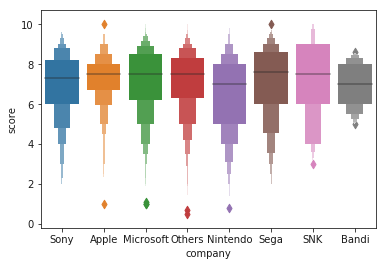

In [46]:
sns.lvplot(x="company", y = "score", data = df)

## Conclusion 3: 
### Review scores v.s. Platform Company
    Games on Apple devices have the highest average review scores (7.322)
    However, Games for Apple devices tends to both get highest scores and lowest socres.
    Games on Nintendo have lowest average review socres (6.446611) 
    Games for Bandi devices very have stable performances (about [6,8])
    For all companiess, it seems that games are more likely to get below average scores.
    

# Question 4: Any trends between review score by genre?

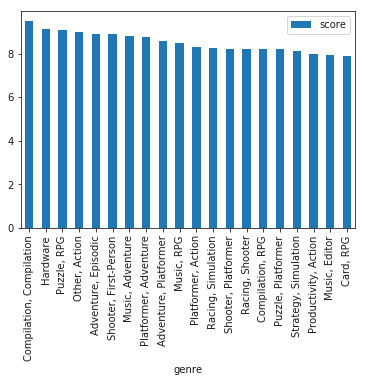

In [47]:
genre_avg = pd.DataFrame(df.groupby("genre").score.mean())
genre_avg.colnames =["genre","score"]
genre_avg.sort_values("score", ascending = False).head(20).plot(kind="bar")

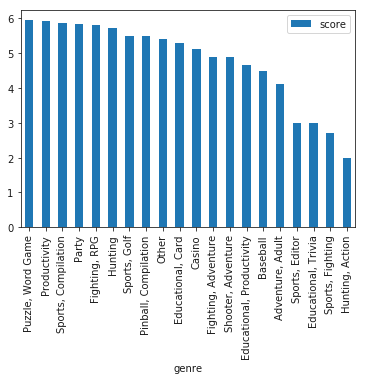

In [48]:
genre_avg.sort_values("score", ascending = False).tail(20).plot(kind="bar")

In [49]:
genre_mean = pd.DataFrame(df.groupby("genre").mean().score)
genre_mean = genre_mean.sort_values('score', ascending = False)
genre_top = genre_mean.head(10)

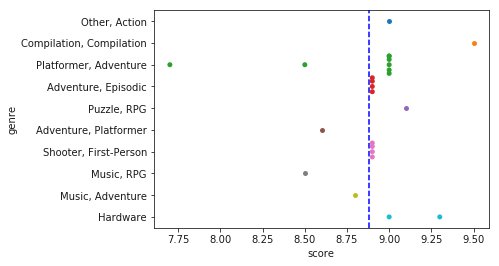

In [50]:
sns.swarmplot(x="score", y = "genre", data = df[df["genre"].isin(genre_top.index)],cmap='Set 3')
plt.axvline(df[df["genre"].isin(genre_top.index)].score.mean(),linestyle='dashed',color='blue')
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

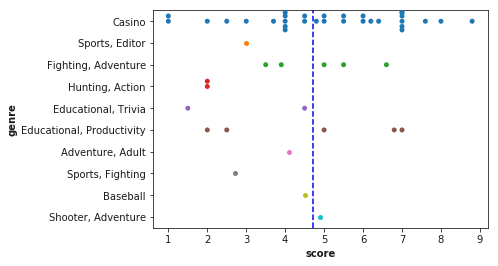

In [51]:
genre_low = genre_mean.tail(10)
sns.swarmplot(x="score", y = "genre", data = df[df["genre"].isin(genre_low.index)],cmap='Set 3')
plt.axvline(df[df["genre"].isin(genre_low.index)].score.mean(),linestyle='dashed',color='blue')
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

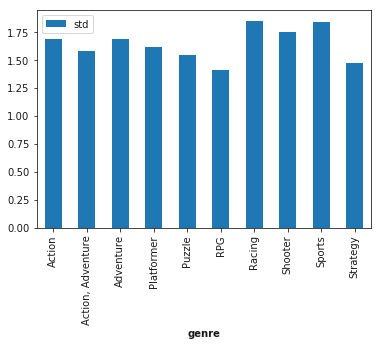

In [52]:
# plot standard deviations
genre_std = df[df["genre"].isin(top_genre.index)].groupby("genre").describe()["score"]
genre_std.plot(y="std",kind="bar")

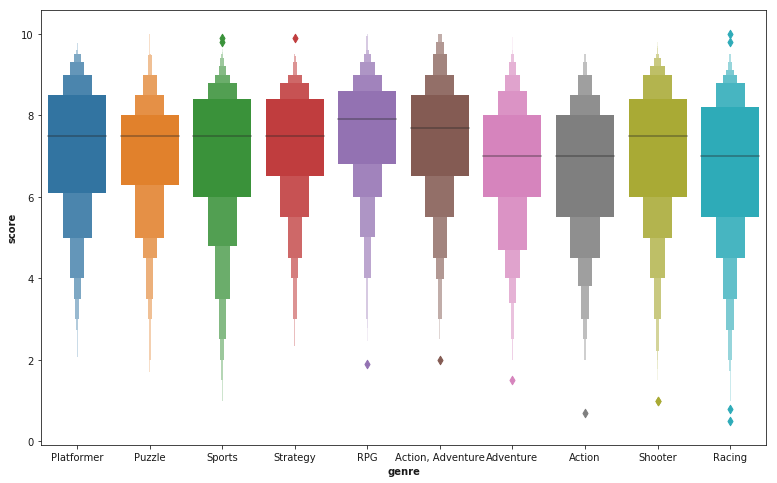

In [53]:
# revies score v.s. genres which has most games released 
plt.figure(figsize=(13,8))
sns.lvplot(x="genre", y = "score", data = df[df["genre"].isin(top_genre.index)])

In [83]:
df[df["release_year"]>=2010].groupby(["platform","genre"]).score.mean().sort_values(ascending=False)

TypeError: '>=' not supported between instances of 'str' and 'int'

## Conclusion 4:
### Review socres v.s. genres
    Top 3 review scores genres: 1) Compilation, complition 2) Hardware 3) PUzzle, RPG 
                       Worst 3: 1) Hunting, Action 2) Sports, Fighting 3) Ducation, Trivia

    The games with very high or very low average scores only has a few games released in its genre. 
    The violin plots of review score corresponding to popular genres (most games released) show that review scores 
    are roughly normally distributed with slight tail to the left (0). From the plot, sports and racing games has largest range of scores and more outliers on both sides.
    The standard deviation of review scores for Racing, Sports and Shooter games are larger than other genre's, indicating there performances are more volitile.


## Question 5: Review score v.s. genres / year

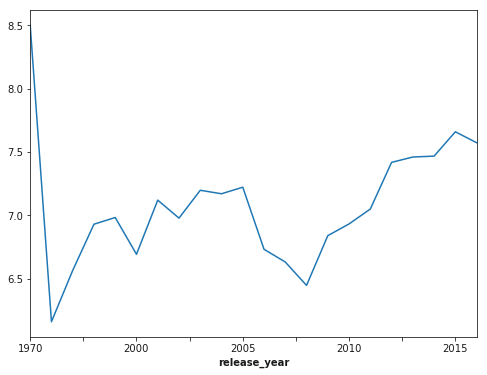

In [54]:
plt.figure(figsize=(8,6))
df.groupby(['release_year']).score.mean().plot()

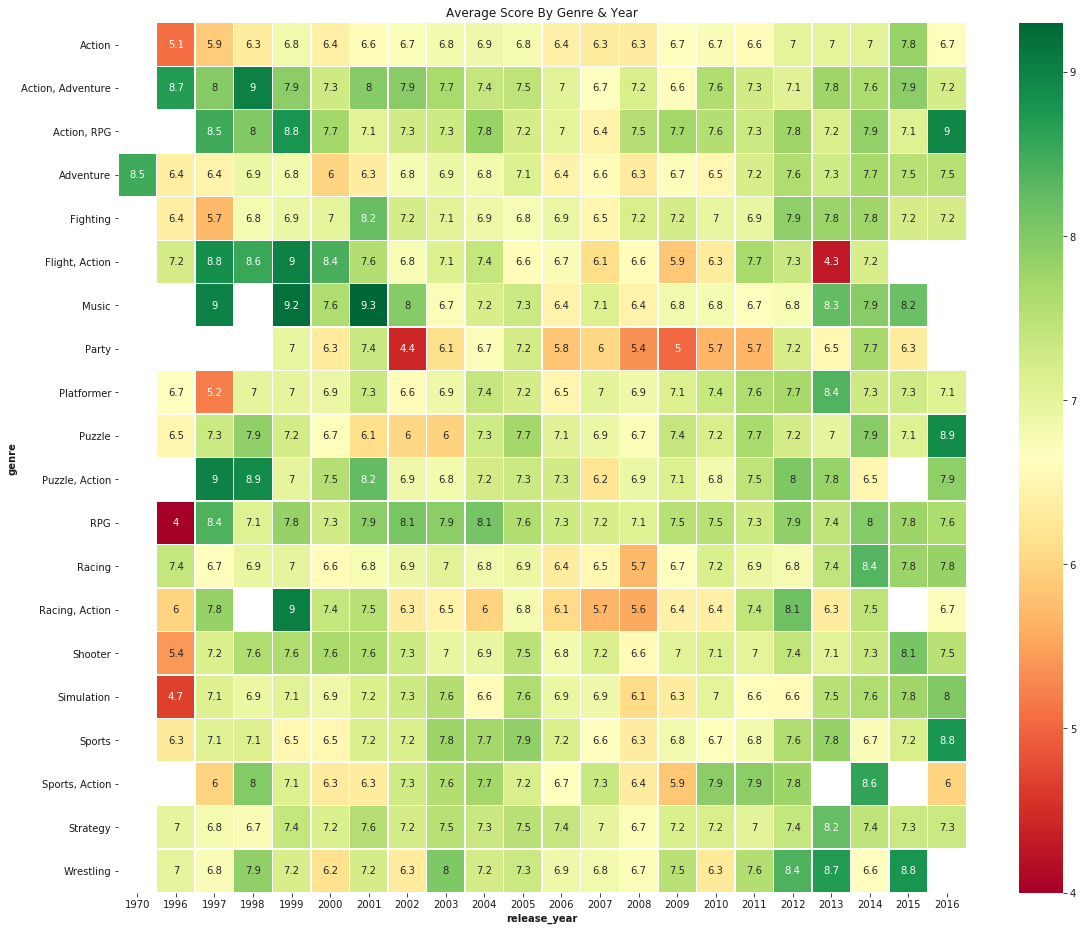

In [55]:
plt.figure(figsize=(19,16))
max_genre_counts = df.genre.value_counts().head(20)
genre_df=df[df["genre"].isin(max_genre_counts.index)]
genre_mean=genre_df.groupby(['release_year','genre']).score.mean().reset_index()
genre_mean=genre_mean.pivot('genre','release_year','score')
sns.heatmap(genre_mean,annot=True,cmap='RdYlGn',linewidths=0.4)
plt.title('Average Score By Genre & Year')

## Conclusion 5: 
### Average Review score by Year and Genre
    The average review socres continues to increase with first drop in 2000, follow by a small drop by 2002.
    The score continues to increase to 2005, and then keep decreasesing till 2008. From 2008, the score keep increasing. The lowest average scores occures in 2008.

    The heatmap also indicate that the average score for many genres in 2008 is lower than others.
    For Fight and action genre games, 2013 is the worst year. 
    


## Part 3:  Worst Games and Best Games

### Question 1: Which are the worst games in the history A. score < 1 B. game in lower 25% percent? 

In [56]:
df[df.score<=1].head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
439,Revolution X,PlayStation,1.0,Action,1996-11-25,Sony,Console,1996,11,25
496,Revolution X,PlayStation,1.0,Action,1996-11-25,Sony,Console,1996,11,25
574,The Crow: City of Angels,PlayStation,1.0,Action,1997-03-11,Sony,Console,1997,3,11
770,Fantastic Four,PlayStation,1.0,Action,1997-08-29,Sony,Console,1997,8,29
848,C: The Contra Adventure,PlayStation,1.0,Action,1998-09-16,Sony,Console,1998,9,16


In [57]:
# score less or equal to 1 
df[df.score<=1].title.unique()

array(['Revolution X', 'The Crow: City of Angels', 'Fantastic Four',
       'C: The Contra Adventure', 'Extreme PaintBrawl',
       "Freestyle Boardin' '99", 'Extreme Watersports',
       'Kawasaki ATV Powersports', 'ESPN NBA 2Night',
       'The Simpsons Wrestling', 'Crime Patrol 2: Drug Wars',
       'NFL Blitz 20-03', 'Fury of The Hulk',
       'Looney Tunes: Back in Action: Zany Race',
       'Baywatch Beach Volleyball', 'High Rollers Casino',
       'NRA Varmint Hunter', 'Elf Bowling 1&2',
       'Offroad Extreme -- Special Edition',
       'Monster Trux Arenas -- Special Edition',
       'Kidz Sports: International Soccer', 'London Taxi: Rush Hour',
       'Kidz Sports: Basketball', 'Kidz Sports: Ice Hockey',
       'Fantasy Aquarium', 'Aquarium', "Backyard Baseball '09",
       'Motocross Championship', 'Action Girlz Racing', 'Mega Man 2',
       'PDC World Championship Darts', 'Hints Hunter', 'Step Up',
       'Self-Defense Training Camp'], dtype=object)

In [58]:
df[df.score<=1].type.value_counts()

Console     22
Portable     5
Others       4
Computer     4
Mobile       1
Name: type, dtype: int64

In [59]:
df[df.score<=1].genre.value_counts()

Sports            11
Action             8
Racing             7
Casino             2
Puzzle             2
Simulation         2
Sports, Action     2
Shooter            2
Name: genre, dtype: int64

In [60]:
#percentage of bad games for each company 
lower_company = pd.DataFrame(df[df.score< df.score.quantile(.25)].company.value_counts()/df.company.value_counts() * 100 )
lower_company.columns = ["Lower_Count_company"]
lower_company.sort_values("Lower_Count_company",ascending = False )

,Lower_Count_company
Nintendo,32.858546
SNK,24.390244
Sony,23.482902
Sega,21.315789
Microsoft,20.231862
Bandi,20.000000
Others,18.910964
Apple,12.526096


In [61]:
# percentage of bad games for each type
lower_type = pd.DataFrame(df[df.score< df.score.quantile(.25)].type.value_counts()/df.type.value_counts() * 100)
lower_type.columns = ["Lower_Count_type"]
lower_type.sort_values("Lower_Count_type", ascending = False)

,Lower_Count_type
Arcade,38.461538
Portable,29.420332
Console,24.274433
Computer,19.031142
Others,14.394766
Mobile,12.751678


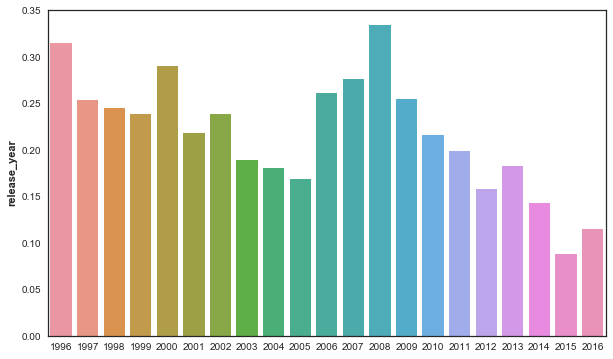

In [62]:
plt.figure(figsize=(10,6))
sns.set(style="white")
worst_year_percent = df[df.score < df.score.quantile(.25)].release_year.value_counts()/df.release_year.value_counts()
worst_year_percent = worst_year_percent.dropna()
sns.barplot(x=worst_year_percent.index, y=worst_year_percent )
#worst_year_percent.index

In [63]:
worst_year_percent.sort_values(ascending = False)

2008    0.334204
1996    0.315436
2000    0.289952
2007    0.275776
2006    0.261589
2009    0.254298
1997    0.253659
1998    0.244838
1999    0.238710
2002    0.238248
2001    0.218023
2010    0.215701
2011    0.198509
2003    0.188854
2013    0.182471
2004    0.180542
2005    0.169118
2012    0.158035
2014    0.143389
2016    0.115044
2015    0.087671
Name: release_year, dtype: float64

# Question 2: Perfect games

In [64]:
perfect10 = df[df.score==10]
perfect10.head(3)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
1058,The Legend of Zelda: Ocarina of Time,Nintendo 64,10.0,"Action, Adventure",1998-11-25,Others,Console,1998,11,25
1287,Pokemon Blue Version,Game Boy,10.0,RPG,1999-06-23,Others,Portable,1999,6,23
1289,Pokemon Red Version,Game Boy,10.0,RPG,1999-06-23,Others,Portable,1999,6,23


In [65]:
df[df.score==10].platform.value_counts()/len(perfect10)

Game Boy Color         0.181818
PlayStation 3          0.163636
Xbox 360               0.090909
PC                     0.090909
PlayStation 4          0.090909
Wii                    0.072727
Xbox One               0.072727
Game Boy               0.054545
Lynx                   0.054545
NeoGeo Pocket Color    0.036364
Nintendo 64            0.018182
iPhone                 0.018182
Macintosh              0.018182
Dreamcast              0.018182
Wireless               0.018182
Name: platform, dtype: float64

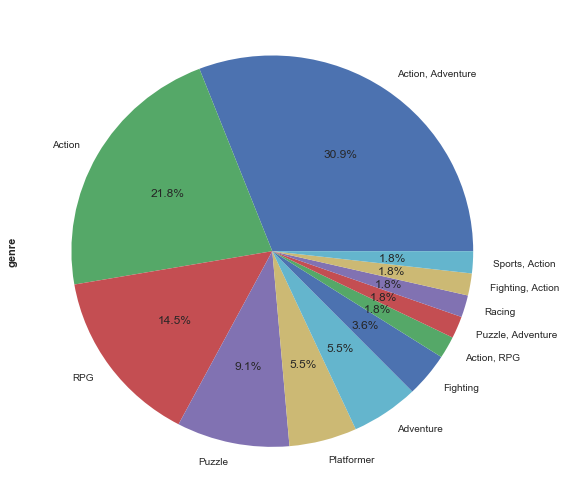

In [66]:
plt.figure(figsize=(9,9))
df[df.score==10].genre.value_counts().plot(kind="pie",autopct='%1.1f%%')

In [67]:
len(perfect10)

55

In [68]:
df[df.score==10].release_year.value_counts()/len(perfect10)

1999    0.200000
2016    0.145455
2008    0.109091
2010    0.090909
2000    0.090909
2011    0.072727
2015    0.072727
2013    0.054545
2014    0.054545
2001    0.054545
2007    0.018182
1998    0.018182
2006    0.018182
Name: release_year, dtype: float64

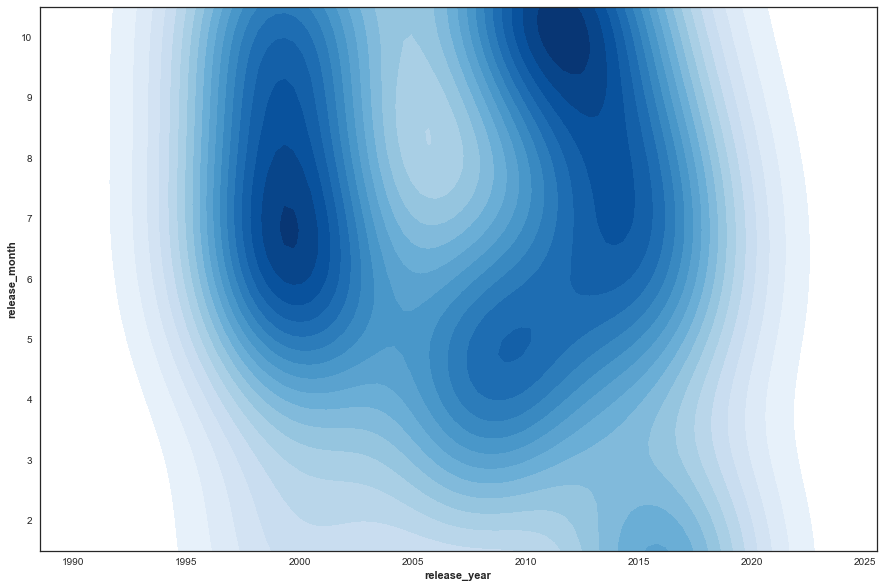

In [69]:
plt.figure(figsize=(15,10))
plt.ylim(1.5,10.5)
sns.kdeplot(perfect10.release_year, perfect10.release_month, n_levels=20, cmap="Blues", shade=True, shade_lowest=False)

## Part 3 Conclusion:
### THE WORST Games:
    32.86% of games for Nintendo falls in the range of a bad game(lower 25%)
    38.461% of games for Arcade is bad game
    33.4% of the games released in 2008 are bad games. 
### The Perfect Games:
    Total of 55 perfect games (review score = 10)
    Top platform: 18% of perfect games is designed for Game Boy Color
    Top genre: 30.9% of perfect games has genre Action, Adventure is perfect.
    Top year: Year 1999 release 20% of perfect games






# Part 4: Inferential Statistics

### A.  More release = More bad games? 
###### 2008 is an unique year of game history
    It is the year with most amouts of games release, yet the highest percentage of bad games released.

    So, what is the relationship between number of releases and avg review scores?


In [70]:
year_counts = df.groupby("release_year").title.size()
year_score = df.groupby("release_year").score.mean()
count_score = pd.DataFrame([year_counts,year_score])
count_score = count_score.transpose()[1:]

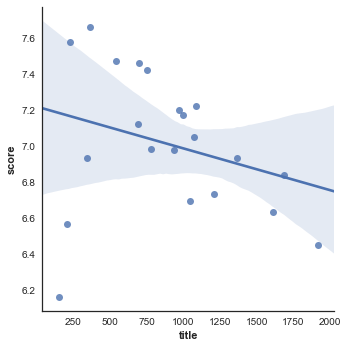

In [71]:
sns.lmplot(x="title",y="score",ci=95,data =count_score)

In [72]:
scipy.stats.linregress(x=count_score["title"], y = count_score["score"] )

LinregressResult(slope=-0.00023164240016039636, intercept=7.2169897691367559, rvalue=-0.2950117502158508, pvalue=0.19419985553589766, stderr=0.00017211936508839383)

### Conclusion A :
Null hypthosis: the slope between number of games released each year and average score for that year is zero.
The leaset square regression indicate there is a negatvie relationship between two variables, however, with p-value = .19>.05, accept the null hypothesis that slope is 0. There statistical evidence that more games relaased results a poor average score.

### B. Number of platforms relseased on v.s. average score? 

In [73]:
platform_counts = df.groupby("title").size()

In [74]:
platform_counts = pd.DataFrame(platform_counts)

In [75]:
platform_counts.columns = ["counts"]

In [76]:
multi_plat_title = platform_counts[platform_counts.counts>1].index

In [77]:
df[df.title.isin(multi_plat_title)].score.mean()

7.058691708462328

In [78]:
oneplatform = platform_counts[platform_counts.counts==1].index

In [79]:
one = df[df.title.isin(oneplatform)].score.mean()

In [80]:
multi2 = platform_counts[platform_counts.counts==2].index
two = df[df.title.isin(multi2 )].score.mean()

In [81]:
multi3 = platform_counts[platform_counts.counts==3].index
three = df[df.title.isin(multi3 )].score.mean()

In [82]:
multi4 = platform_counts[platform_counts.counts==4].index
four = df[df.title.isin(multi4 )].score.mean()

In [83]:
multi5p = platform_counts[platform_counts.counts>4].index
five = df[df.title.isin(multi5p )].score.mean()

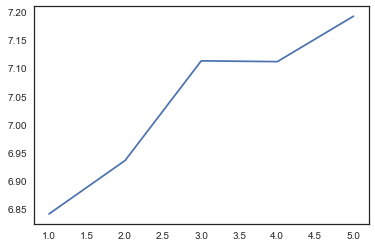

In [84]:
x=["1","2","3","4","5"]
y= [one, two, three, four, five]
plt.plot(x,y)

In [85]:
scipy.stats.linregress(x=[1,2,3,4,5], y=[one, two, three, four, five])

LinregressResult(slope=0.087781977078990103, intercept=6.7752134349563322, rvalue=0.95784867532606044, pvalue=0.010322516405035124, stderr=0.015199979503756782)

#### Conclusion B:
Null hpythosis: no relationship between average score and number of platforms a game released on (slope = 0). P-value =.0103, so reject the null hypothesis and conclude there is a positive relationship between two variables.
Least square linear regression slope = .087, indicate a positive relationship between two variables. The more platforms released on, the higher average score.

### C.score v.s difference between platform release date and game release date?

In [86]:
df_type.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day,console_date
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
2,Madden NFL 13,PlayStation Vita,6.0,Sports,2012-08-24,Sony,Portable,2012,8,24,2011-12-17
3,FIFA Soccer 13,PlayStation Vita,4.0,Sports,2012-10-12,Sony,Portable,2012,10,12,2011-12-17
4,New Little King's Story,PlayStation Vita,5.8,RPG,2012-10-11,Sony,Portable,2012,10,11,2011-12-17


In [87]:
df_type["diff"] = df_type.date-df_type.console_date


In [88]:
df_type["diff_D"] = df_type["diff"].astype('timedelta64[D]')

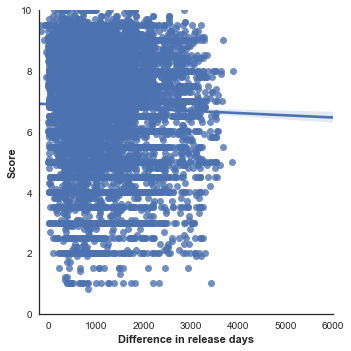

In [89]:
g = sns.lmplot(x="diff_D",y="score",ci=95,data =df_type[df_type["diff_D"]>-200])
g = (g.set_axis_labels("Difference in release days", "Score").set(xlim=(-200, 6000), ylim=(0, 10)))

In [90]:
scipy.stats.linregress(x=df_type.diff_D,y=df_type.score)

LinregressResult(slope=-7.485788318899834e-05, intercept=6.894994196871334, rvalue=-0.035671628324767078, pvalue=0.00013007098569132463, stderr=1.9557263293678986e-05)

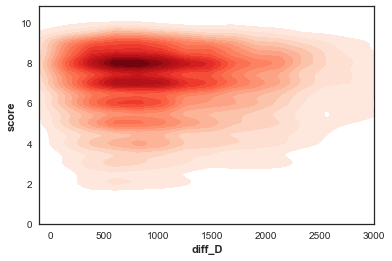

In [91]:
plt.xlim(-100,3000)
sns.kdeplot(df_type.diff_D, df_type.score, n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

In [92]:
df_type["diff_Y"] = df_type["diff"].astype('timedelta64[Y]')

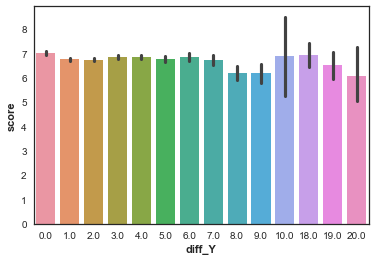

In [93]:
sns.barplot(x="diff_Y",y="score",data =df_type[df_type["diff_Y"]>=0])

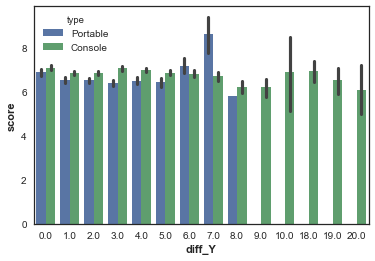

In [94]:
sns.barplot(x="diff_Y",y="score",hue="type",data =df_type[df_type["diff_Y"]>=0])

### Conclusion C:
Null hypothesis: no relationship between difference of game & console release days and score of games.
Fitting least square linear regression to x= difference in release days and y = score, slope is negative with p-value<.01. So reject null hypothesis and conclude that there is significant relationship between two variables. The later game released after the platform is released, the lower the score.

The kdeplot shows the density of scores and difference in releases dates. Most of games are released after 500-1000 days after a particular platform is released and has a score around 8. 
Plotting year difference between game and platform release dates, we can see that no clear trends. However, average score decreases after 7 years of platforms released and increase at year 10,but continue decrease as years passed by.  
The bar chart shows that portable game has score less than console games before year 6. At year 6 and 7, the portable games outperform console games. 


## D. scores by game series

In [95]:
from fuzzywuzzy import fuzz

/Users/Yihan/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [96]:
fuzz.partial_ratio("Unreal Tournament 2004", "Uno 52")

50

In [97]:
title_np = df.sort_values("title").title.unique()

In [98]:
title_ls = list()
title0_ls = list()
fuzz_ls = list()
for i in range(1,len(title_np)):
    title0 = str(title_np[i-1])
    title1= str(title_np[i])
    title_ls.append(title1)
    title0_ls.append(title0)
    fuzz_ls.append(fuzz.partial_ratio(title0, title1))

In [99]:
fz = pd.DataFrame([title0_ls,title_ls,fuzz_ls])

In [100]:
fz=fz.transpose()

In [101]:
fz.columns = ["title0","title1","fuzz_score"]

In [102]:
a=fz[fz.fuzz_score>=65].title0.tolist()
b=fz[fz.fuzz_score>=65].title1.tolist()
series_title = list(set(a+b))

In [103]:
df.head(3)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
2,Splice: Tree of Life,iPad,8.5,Puzzle,2012-09-12,Apple,Mobile,2012,9,12


In [104]:
df[df["title"].isin(series_title)].score.mean()

7.150191570881255

In [105]:
df[~df["title"].isin(series_title)].score.mean()

6.482923766816148

In [106]:
scipy.stats.ttest_ind(df[df["title"].isin(series_title)].score, df[~df["title"].isin(series_title)].score, axis=0, equal_var=True, nan_policy='propagate')


Ttest_indResult(statistic=24.760817675797409, pvalue=3.3609592442761988e-133)

In [107]:
df[df["title"].isin(series_title)].groupby("type").size()

type
Arcade        11
Computer    2328
Console     7101
Mobile       665
Others       619
Portable    2326
dtype: int64

In [108]:
df[~df["title"].isin(series_title)].groupby("type").size()

type
Arcade         2
Computer    1140
Console     2650
Mobile       378
Others       298
Portable    1107
dtype: int64

In [109]:
series_counts = pd.DataFrame([df[df["title"].isin(series_title)].groupby("type").size(),df[~df["title"].isin(series_title)].groupby("type").size()])

In [110]:
series_counts = series_counts.transpose()

In [111]:
series_counts.columns = ["series","non_series"]

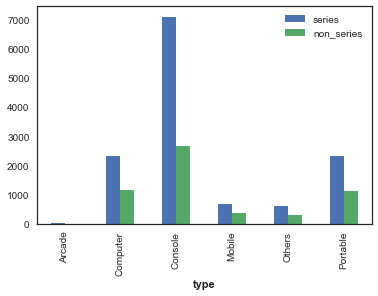

In [112]:
series_counts.plot(kind="bar")

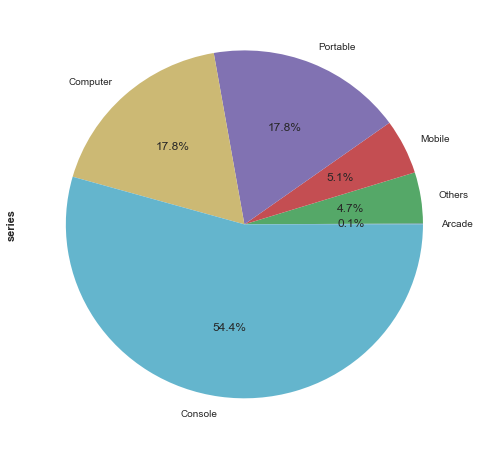

In [113]:
plt.figure(figsize=(8,8))
series_counts.sort_values("series")["series"].plot(kind="pie",autopct='%1.1f%%')

In [114]:
series = df[df["title"].isin(series_title)].groupby("type").score.mean()


In [115]:
na_series = df[~df["title"].isin(series_title)].groupby("type").score.mean()

In [116]:
compare_type_serires = pd.DataFrame([series, na_series]).transpose()

In [117]:
compare_type_serires.columns = ["series","non-series"]

In [118]:
compare_type_serires

,series,non-series
type,,
Arcade,6.036364,6.250000
Computer,7.395490,6.711579
Console,7.169159,6.335472
Mobile,7.346617,7.235450
Others,7.240065,6.995973
Portable,6.771969,6.205781


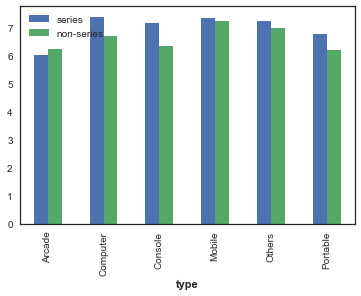

In [119]:
compare_type_serires.plot(kind="bar")

### Conclusion D:
There are more series games than non-series games for all types, in particular console games. In series games, there’re 54.4% of games released for a console, and follow by 17.8% Computer and 17.8% portable games

Test the null hypothesis that two group has same mean by independent t test, p-value<.001, reject the null hypothesis and conclude there is significant difference between two groups. Game series has higher score than non-series group.Series games has average score (mean = 7.15) higher than non-series games(mean = 6.48) 

Except for arcade games, series games for different types platforms has higher score than non-series games.



### E. Linear regression & important features


In [179]:
dfplatform = pd.get_dummies(df_type["platform"])
dfgenre=pd.get_dummies(df_type["genre"])
dfcompany = pd.get_dummies(df_type["company"])
dftype = pd.get_dummies(df_type["type"])

X = df_type[["score","release_month","release_day","diff_D"]]
X_all = pd.concat([X, dfplatform,dfgenre,dfcompany,dftype], axis=1)
X_x = X_all.iloc[:,1:]

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_x, X_all["score"], test_size=0.2, random_state=42)



regr = linear_model.LinearRegression()
regression = regr.fit(X_train, y_train)
y_pred = regression.predict(X_test)
print('Coefficients: \n', regression.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [  8.63547681e-03   3.42217308e-03  -7.67588243e-05   1.36183485e-01
  -5.08914113e-02  -3.52227414e-01  -6.22924093e-02   2.58725553e-03
   5.34937019e-01  -4.65340124e-03  -2.90763336e-01  -1.19930714e-01
  -4.62040181e-01  -1.74954487e-01   4.68749929e-01  -1.65849406e-01
   3.56440409e-01  -4.76625725e-01   4.99022384e-01  -2.76046088e-02
  -1.06862660e-01   2.96775273e-01   5.41281456e-01   1.27663182e+00
   8.98549857e-01   1.93108306e+00  -1.10950213e+00  -8.31753916e-01
   1.62669978e+00   8.85899964e-01  -2.44670088e-01   6.40268588e-01
   1.74910617e-01   1.80256210e+00   2.81965776e+00   9.41896778e-01
   7.71092442e-02   4.30508116e-01   1.19274001e+00   4.75936804e-01
   1.14112829e+00   3.72792388e-01   1.58483337e+00  -1.51456126e+00
   8.17955364e-01   2.09810058e-01   6.26836560e-01   1.94985001e+00
  -1.72919187e+00   8.27252314e-01   1.98875395e+00   1.49632630e-16
   9.76973326e-01   6.58910908e-01  -8.90530472e-01   1.29379938e+00
   6.25376315e-01 

In [180]:
import statsmodels.api as sm
import scipy
import statsmodels
from statsmodels.formula.api import ols
lm = ols('score ~ C(platform)+C(genre)+C(company)+ C(type)+release_month+release_day+diff_D', data=df_type).fit()
table = sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                     sum_sq       df           F         PR(>F)
C(platform)     9159.566370     18.0  177.003290   0.000000e+00
C(genre)        1849.680033     94.0    6.844594   5.623130e-80
C(company)      2773.521905      4.0  241.185135  3.729724e-199
C(type)            0.355308      1.0    0.123590   7.251794e-01
release_month      7.609092      1.0    2.646743   1.037900e-01
release_day        9.289284      1.0    3.231180   7.227512e-02
diff_D            59.620012      1.0   20.738197   5.320233e-06
Residual       32693.236939  11372.0         NaN            NaN


In [185]:
lm.conf_int()

,0,1
Intercept,5.808849,6.036526
C(platform)[T.Game Boy Advance],-0.113474,0.150352
C(platform)[T.Game Boy Color],-0.534723,-0.209242
C(platform)[T.GameCube],0.128929,0.367141
C(platform)[T.Genesis],-0.686518,0.476878
C(platform)[T.Nintendo 3DS],0.392180,0.789888
C(platform)[T.Nintendo 64],0.131938,0.406112
C(platform)[T.Nintendo DS],-0.345199,-0.117198
C(platform)[T.Nintendo DSi],-0.348985,0.031644
C(platform)[T.PlayStation],-0.314412,-0.094596


In [193]:
    lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.25
Date:                Mon, 09 Oct 2017   Prob (F-statistic):          4.11e-186
Time:                        03:32:43   Log-Likelihood:                -22308.
No. Observations:               11488   AIC:                         4.485e+04
Df Residuals:                   11372   BIC:                         4.570e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 5.9227      0.058    101.982      0.000       5.809       6.037
C(platform)[T.Game Boy Advance]           0.0184      0.067      0.274      0.784      -0.113       0.150
C(platform)[T.Game Boy Color]            -0.3720      0.083     -4.480      0.000      -0.535      -0.209
C(platform)[T.GameCube]                   0.2480      0.061      4.082      0.000       0.129       0.367
C(platform)[T.Genesis]                   -0.1048      0.297     -0.353      0.724      -0.687       0.477
C(platform)[T.Nintendo 3DS]               0.5910      0.101      5.826      0.000       0.392       0.790
C(platform)[T.Nintendo 64]                0.2690      0.070      3.847      0.000       0.132       0.406
C(platform)[T.Nintendo DS]               -0.2312      0.058     -3.975      0.000      -0.345      -0.117
C(platform)[T.Nintendo DSi]              -0.1587      0.097     -1.634      0.102      -0.349       0.032
C(platform)[T.PlayStation]               -0.2045      0.056     -3.647      0.000      -0.314      -0.095
C(platform)[T.PlayStation 2]              0.0463      0.050      0.923      0.356      -0.052       0.145
C(platform)[T.PlayStation 4]              0.6507      0.088      7.419      0.000       0.479       0.823
C(platform)[T.PlayStation Portable]      -0.1546      0.067     -2.314      0.021      -0.286      -0.024
C(platform)[T.PlayStation Vita]           0.3217      0.105      3.049      0.002       0.115       0.528
C(platform)[T.Wii]                       -0.2500      0.056     -4.466      0.000      -0.360      -0.140
C(platform)[T.Wii U]                      0.7681      0.127      6.057      0.000       0.520       1.017
C(platform)[T.Xbox]                       0.9765      0.058     16.938      0.000       0.863       1.090
C(platform)[T.Xbox 360]                   0.9162      0.049     18.759      0.000       0.820       1.012
C(platform)[T.Xbox One]                   1.3264      0.106     12.525      0.000       1.119       1.534
C(genre)[T.Action, Adventure]             0.7853      0.081      9.751      0.000       0.627       0.943
C(genre)[T.Action, Compilation]           0.3827      0.202      1.898      0.058      -0.013       0.778
C(genre)[T.Action, Editor]                1.3475      1.697      0.794      0.427      -1.978       4.673
C(genre)[T.Action, Platformer]           -1.6313      1.204     -1.355      0.175      -3.991       0.729
C(genre)[T.Action, Puzzle]               -1.3871      1.699     -0.816      0.414      -4.718       1.944
C(genre)[T.Action, RPG]                   1.0587      0.130      8.125      0.000       0.803       1.314
C(genre)[T.Action, Simulation]            0.3347      0.426      0.785      0.432      -0.501       1.170
C(genre)[

# Part 5:  Myths of the game titles

In [120]:
df_type.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day,console_date,diff,diff_D,diff_Y
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17,270 days,270.0,0.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17,270 days,270.0,0.0
2,Madden NFL 13,PlayStation Vita,6.0,Sports,2012-08-24,Sony,Portable,2012,8,24,2011-12-17,251 days,251.0,0.0
3,FIFA Soccer 13,PlayStation Vita,4.0,Sports,2012-10-12,Sony,Portable,2012,10,12,2011-12-17,300 days,300.0,0.0
4,New Little King's Story,PlayStation Vita,5.8,RPG,2012-10-11,Sony,Portable,2012,10,11,2011-12-17,299 days,299.0,0.0


In [121]:
df_type["good"] = df_type.score>=6

In [122]:
df_type.head(2)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day,console_date,diff,diff_D,diff_Y,good
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17,270 days,270.0,0.0,True
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17,270 days,270.0,0.0,True


### A: Game Title Sentiment Analysis

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=50, max_df = 1200)

X = vectorizer.fit_transform(df_type.title)
X = X.tocsc()  # some versions of sklearn return COO format
y = df_type["good"].values.astype(np.int)

In [124]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df= word_freq_df.sort_values('occurrences',ascending = True)

In [125]:
word_freq_df["cumulative"] = np.cumsum(word_freq_df.frequency)
word_freq_df.tail(5)

,occurrences,term,frequency,cumulative
48,210,ii,0.019206,0.818731
40,218,game,0.019938,0.838668
29,244,edition,0.022316,0.860984
110,269,world,0.024602,0.885586
72,1251,of,0.114414,1.000000


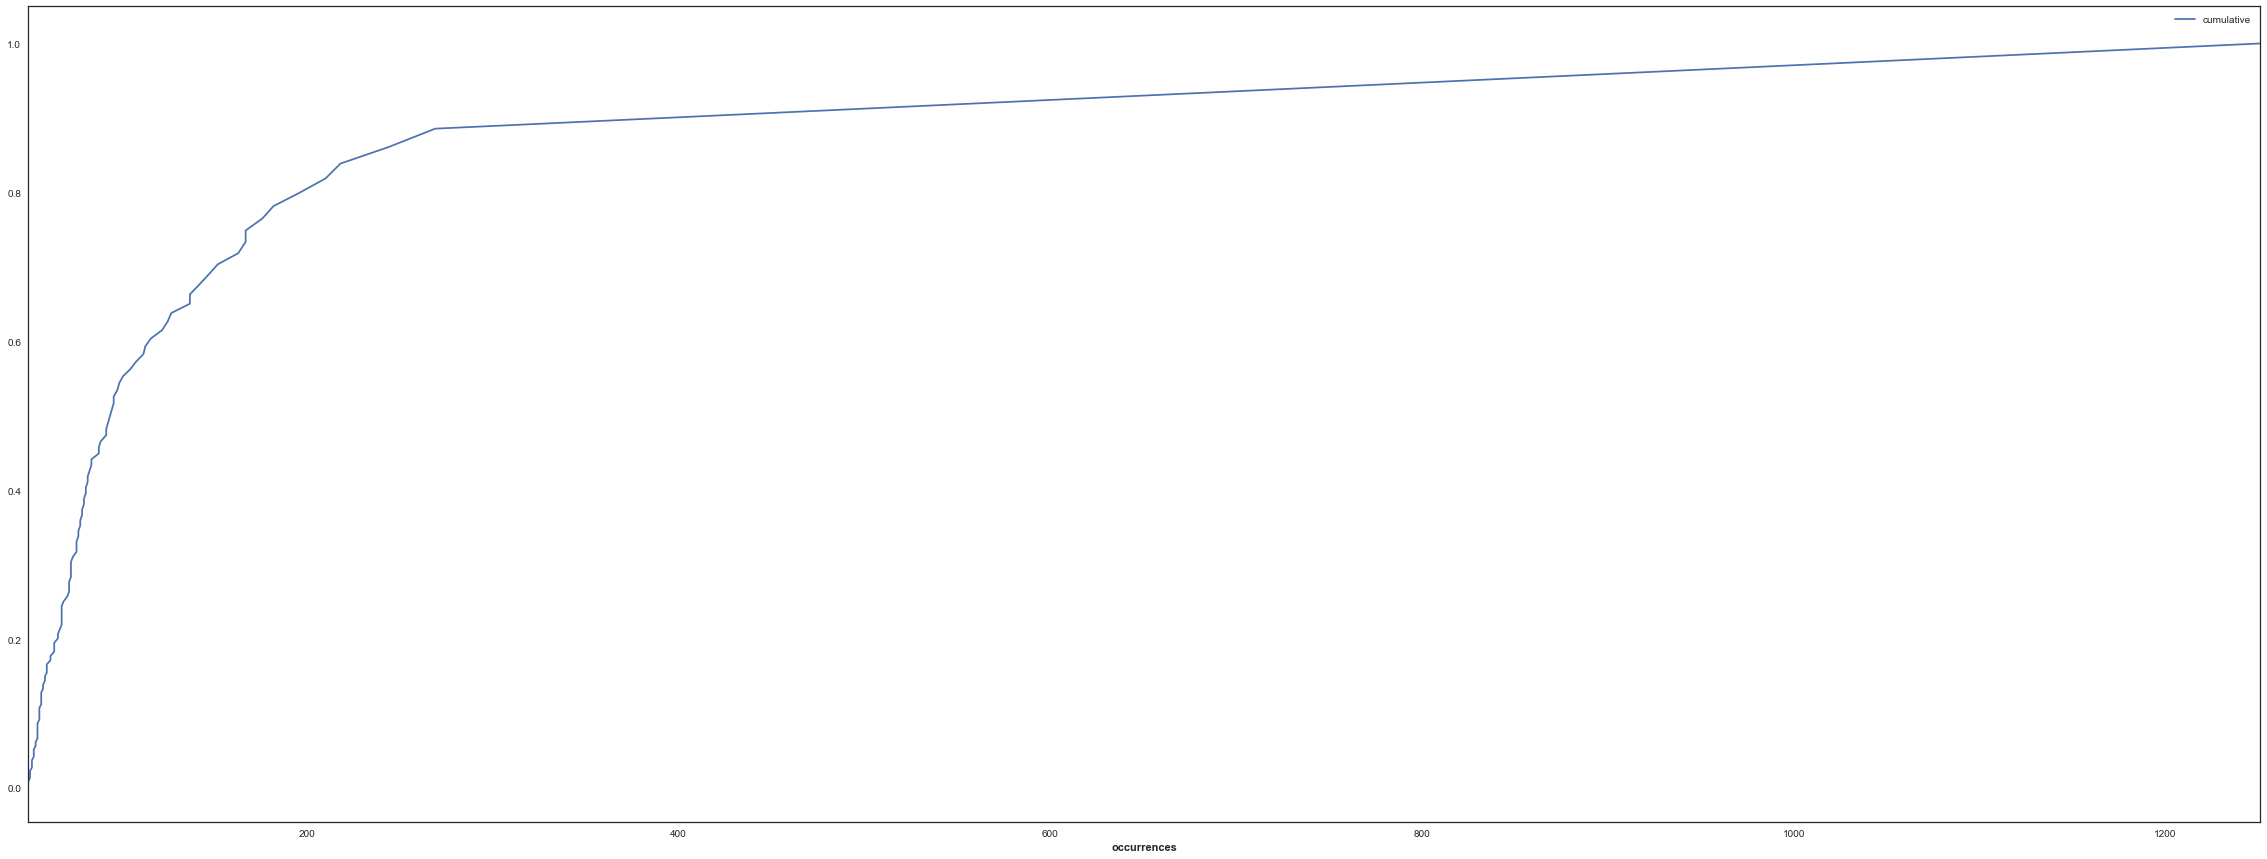

In [126]:
freq = word_freq_df[["occurrences","cumulative"]]
freq.plot(x="occurrences",y="cumulative",figsize=(40,15))
plt.show()

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print ("MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest)))

MN Accuracy: 72.98%


/Users/Yihan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [128]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print ("Accuracy on training data: %0.2f" % (training_accuracy))
print ("Accuracy on test data:     %0.2f" % (test_accuracy))

Accuracy on training data: 0.74
Accuracy on test data:     0.73


In [129]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:15]]
bad_words = words[ind[-15:]]

good_prob = probs[ind[:15]]
bad_prob = probs[ind[-15:]]

print("Good words\t     P(good | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(good | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(good | word)
                gear 0.97
              madden 0.96
                 nhl 0.93
               mario 0.92
               tiger 0.91
               grand 0.91
               woods 0.91
               final 0.90
                2004 0.90
             fantasy 0.89
                call 0.89
                 nfl 0.88
          collection 0.88
                ncaa 0.88
                fifa 0.88
Bad words	     P(good | word)
                time 0.61
              battle 0.61
           challenge 0.60
           adventure 0.60
              racing 0.60
              spider 0.60
               party 0.58
                  in 0.58
               force 0.56
            warriors 0.51
             monster 0.50
                rise 0.49
              sports 0.48
               games 0.44
                 men 0.39


### B. Unsupervized Learning analysis of Game titles 

In [130]:
# unsupervized learning analysis of text
import gensim

Using TensorFlow backend.


In [131]:
X=vectorizer.fit_transform(df_type.title)
corpus=vectorizer.get_feature_names()
id2words = dict((v, k) for k, v in vectorizer.vocabulary_.items())
corpus_gensim = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
lda = gensim.models.ldamodel.LdaModel(corpus_gensim, id2word=id2words, num_topics=10, update_every=1, chunksize=1000, passes=1)

In [132]:
lda.print_topics()

[(0,
  '0.160*"world" + 0.120*"star" + 0.107*"wars" + 0.082*"tour" + 0.069*"fifa" + 0.065*"vs" + 0.063*"iii" + 0.057*"soccer" + 0.045*"tiger" + 0.040*"championship"'),
 (1,
  '0.243*"edition" + 0.163*"super" + 0.117*"mario" + 0.111*"street" + 0.089*"heroes" + 0.055*"on" + 0.047*"tennis" + 0.046*"fighter" + 0.039*"space" + 0.038*"lego"'),
 (2,
  '0.163*"dragon" + 0.151*"to" + 0.131*"nhl" + 0.125*"tom" + 0.116*"clancy" + 0.082*"ball" + 0.070*"arcade" + 0.062*"monster" + 0.041*"pokemon" + 0.016*"2001"'),
 (3,
  '0.243*"ii" + 0.151*"for" + 0.148*"battle" + 0.130*"2005" + 0.091*"speed" + 0.083*"revenge" + 0.077*"need" + 0.054*"2000" + 0.004*"2001" + 0.002*"racer"'),
 (4,
  '0.181*"of" + 0.143*"game" + 0.117*"series" + 0.098*"dark" + 0.094*"rise" + 0.069*"chronicles" + 0.067*"shadow" + 0.066*"hawk" + 0.060*"tony" + 0.053*"night"'),
 (5,
  '0.134*"pro" + 0.088*"mega" + 0.085*"dead" + 0.080*"legends" + 0.078*"ncaa" + 0.067*"games" + 0.067*"man" + 0.065*"evolution" + 0.063*"football" + 0.058*"r

### C. Common Words in Game Titles Tag Cloud

In [133]:
import nltk

In [134]:
t = df.title.apply(nltk.word_tokenize).sum()
from collections import Counter
from string import punctuation

def content_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    without_stp  = Counter()
    for word in text:
        word = word.lower()
        if len(word) < 3:
            continue
        if word not in stopwords:
            without_stp.update([word])
    return [(y,c) for y,c in without_stp.most_common(20)]

without_stop = content_text(t)
without_stop

[('edition', 421),
 ('world', 388),
 ('game', 372),
 ('star', 291),
 ('wars', 271),
 ('dead', 222),
 ('super', 218),
 ('nba', 212),
 ('episode', 210),
 ('dragon', 207),
 ('racing', 204),
 ('war', 197),
 ('nfl', 196),
 ('iii', 185),
 ('battle', 176),
 ('soccer', 169),
 ('heroes', 164),
 ('pro', 163),
 ('tour', 163),
 ('dark', 149)]

(-0.5, 399.5, 199.5, -0.5)

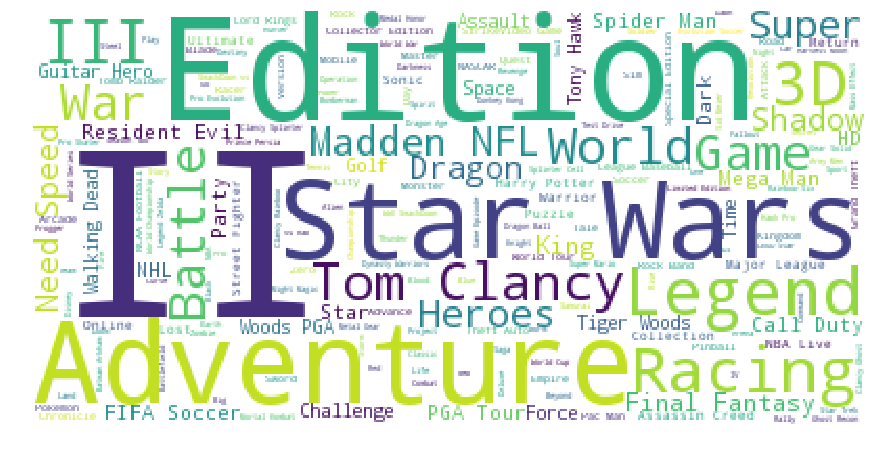

In [135]:
from PIL import Image
import random
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(t)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', max_font_size=110, stopwords=stopwords, 
                      random_state=3, relative_scaling=.5).generate(text)
plt.figure(figsize=(15,18))
plt.imshow(wordcloud)
plt.axis('off')